In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

In [2]:
def get_df():

    """Get unimputed ViEWS data"""

    path = '/home/polichinel/Documents/Articles/conflict_prediction/data/ViEWS/'
    file_name = 'ucdp_views_priogrid_month.csv'

    file_path = os.path.join(path, file_name)
    df = pd.read_csv(file_path)

    return(df)

df = get_df()

In [3]:
def get_prio_coord():

    """Get prio coords"""

    path = '/home/polichinel/Documents/Articles/conflict_prediction/data/PRIO/'
    file_name = 'prio_coord.pkl'

    file_path = os.path.join(path, file_name)
    prio_coord = pd.read_pickle(file_path)

    return(prio_coord)

prio_coord = get_prio_coord()

In [4]:
# mergning to get coords
new_df = pd.merge(df, prio_coord, how = 'left', on = 'pg_id')

# (re) creating the "best" feature
new_df['ged_best'] = new_df['ged_best_sb'] + new_df['ged_best_ns'] + new_df['ged_best_os']

# creating log versions
new_df['ged_logbest'] = np.log(new_df['ged_best'] + 1)
new_df['ged_logbest_sb'] = np.log(new_df['ged_best_sb'] + 1)
new_df['ged_logbest_ns'] = np.log(new_df['ged_best_ns'] + 1)
new_df['ged_logbest_os'] = np.log(new_df['ged_best_os'] + 1)

# Aggregating
test_df = new_df.groupby(['year', 'pg_id', 'xcoord', 'ycoord']).sum()[['ged_logbest', 'ged_logbest_sb' , 'ged_logbest_ns', 'ged_logbest_os']].reset_index()

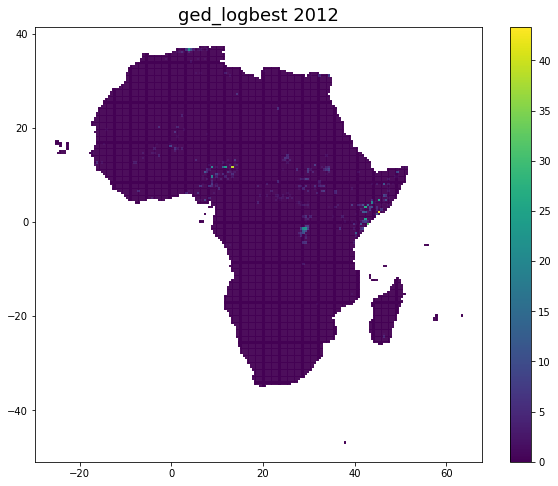

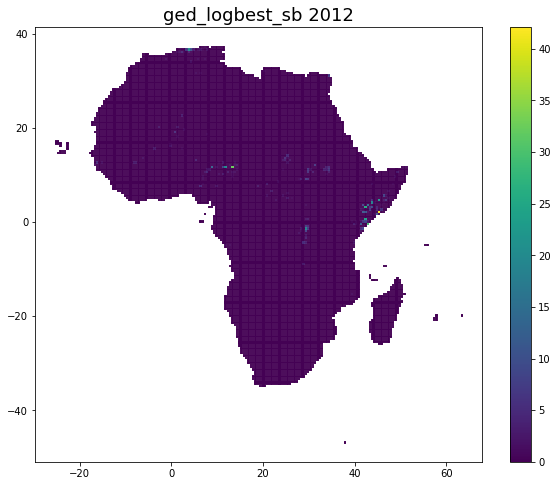

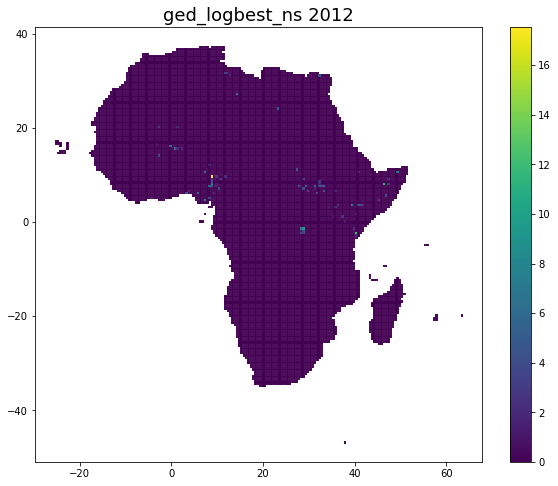

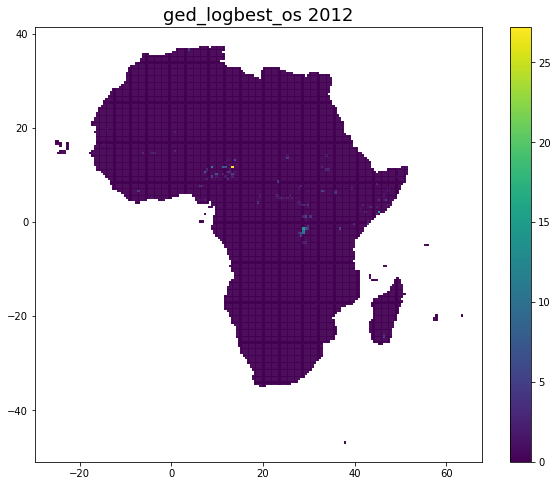

In [5]:
 # Just checking that it looks familiar

 for i in ['ged_logbest', 'ged_logbest_sb' , 'ged_logbest_ns', 'ged_logbest_os']:
 
    plt.figure(figsize = [10,8])
    plt.title(f'{i} 2012', fontsize = 18)
    
    plt.scatter(
        test_df[test_df['year'] == 2012]['xcoord'], 
        test_df[test_df['year'] == 2012]['ycoord'], 
        c = test_df[test_df['year'] == 2012][i], s=2, marker='s')
    
    plt.colorbar()
    plt.show()

In [6]:
print(f"years from {new_df['year'].min()} to {new_df['year'].min()}. Shape: {new_df.shape}")

years from 1989 to 1989. Shape: (3843720, 22)


In [7]:
file_name = "/home/polichinel/Documents/Articles/conflict_prediction/data/ViEWS/ViEWS_coord.pkl"
output = open(file_name, 'wb')
pickle.dump(prio_coord, output)
output.close()